# Name :Wei chengyuan


#Title : the tile puzzle

#Idea / Concept / Inspiration :  Sol_LeWitt  https://www.moma.org/calendar/exhibitions/305

#Method : 

place a 4 point B-spline in a square, each point take a corner of the square.2 points are the start and the end of the curve and another 2 are the contral points. the picking sequence is random, so within the randomness there are 4 different patterns each one have 4 different orientations, thus in total 16 veriations.  Array all the squares in matrix    


In [61]:
import matplotlib.pyplot as plt
import math
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import random
import matplotlib.path as mpath
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt


In [62]:
class Rect(object):

    def __init__(self, x1, y1, x2, y2):
        self.x1 = x1
        self.x2 = x2
        self.y1 = y1
        self.y2 = y2
        
        t=0.5
        
        self.cx = t * ( x1 + x2 )
        self.cy = t * ( y1 + y2 )

        
        self.x= [self.x1, self.x1, self.x2, self.x2]
        self.y = [self.y1, self.y2, self.y2, self.y1 ]
        
        self.a = [self.x1,self.y1]
        self.b = [self.x1,self.y2]
        self.c = [self.x2,self.y2]
        self.d = [self.x2,self.y1]

# Square function
        
    def display(self, colorv):
        
        plt.fill(self.x, self.y, c=colorv, linewidth=1)
    
# Curve function  
    
    def curves(self,line_width,_edgecolor,_facecolor):
        
# select four point in random sequences 

        Ps = [self.a,self.b,self.c,self.d]
        p1 = Ps.pop(random.randint(0,3))
        p2 = Ps.pop(random.randint(0,2))
        p3 = Ps.pop(random.randint(0,1))
        p4 = Ps[0]

# list of point properties and point coordinates
        
        string_path_data = [
            (mpath.Path.MOVETO, p1),
            (mpath.Path.CURVE4, p2),
            (mpath.Path.CURVE4, p3),
            (mpath.Path.CURVE4, p4)]

        codes, verts = zip(*string_path_data)
        string_path = mpath.Path(verts, codes)
        patch = mpatches.PathPatch(string_path, facecolor=_facecolor, lw=line_width,edgecolor=_edgecolor)

        ax.add_patch(patch)
        patch.set_capstyle('round')
        patch.set_hatch('////')

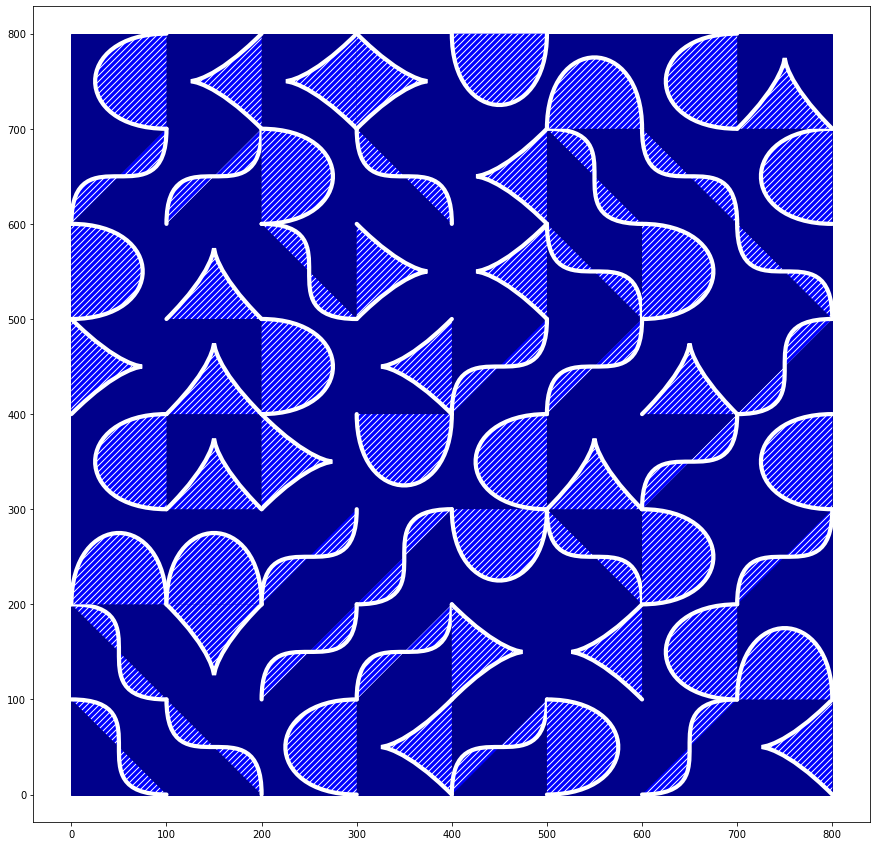

In [140]:
fig, ax = plt.subplots(figsize=(15,15))
plt.axis('equal')

rects = []
gap = 0
scale = 8

# generate an array of squares 

for x in range(scale):
    for y in range(scale):
        r = Rect(x*100 + x*gap, y*100+ y*gap, (x+1)*100+ x*gap, (y+1)*100+ y*gap)
        r.display('darkblue')
        rects.append(r)
        
# generate curve on each squares 
        
for k in rects:
    k.curves(5-scale*.1,'white','blue')
    
plt.savefig("test_1.png", dpi=600)
plt.show()

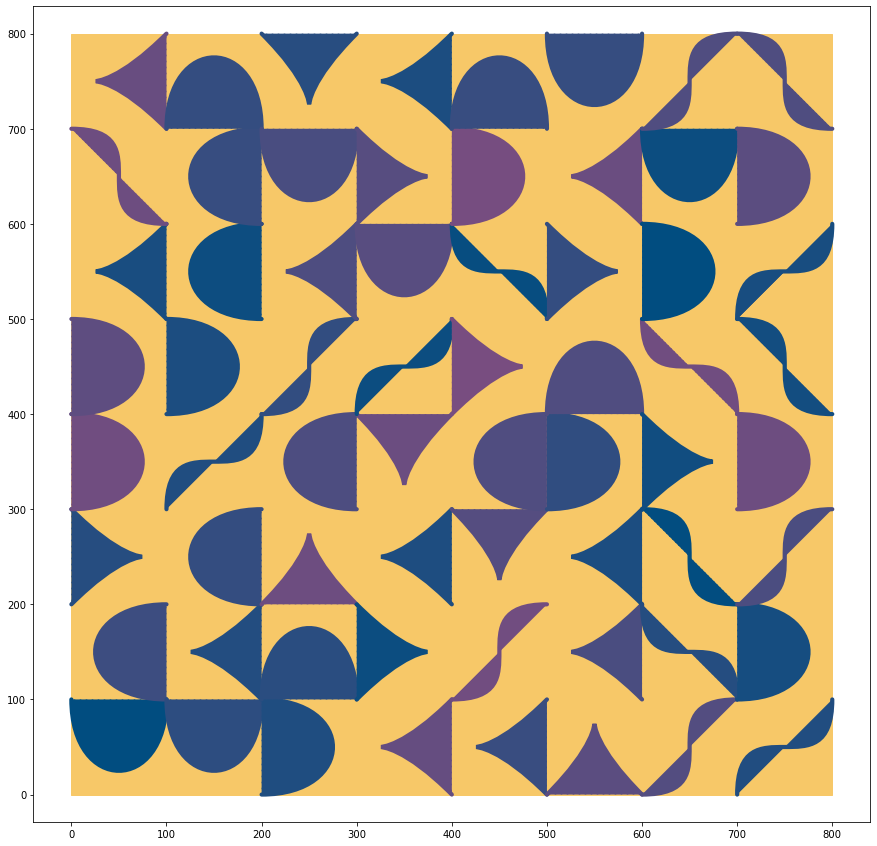

In [139]:


fig, ax = plt.subplots(figsize=(15,15))
plt.axis('equal')

rects = []
# gap = 0
# scale = 10
# color_combo=1
# generate an array of squares 

ctb = ['#f7c868','#C9A0DC','#100c08']
for x in range(scale):
    for y in range(scale):
        r = Rect(x*100 + x*gap, y*100+ y*gap, (x+1)*100+ x*gap, (y+1)*100+ y*gap)
        r.display(ctb[color_combo-1])
        rects.append(r)

# generate curve on each squares 

for k in rects:
    ct = [[random.uniform(0,0.5),0.3, 0.5, 1],[0.4, random.uniform(0.5,1), 0.7, 1],[0.2,0.4,random.uniform(0.5,1),1]]
    k.curves(5-scale*.1,ct[color_combo-1],ct[color_combo-1])

plt.savefig("test_1.png", dpi=600)
plt.show()

